In [1]:
library('moderndive')
library('tidyverse')
library('purrr')

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
this_is_a_function = function() {
    print('TEST')
}

this_is_a_function()

[1] "TEST"


In [3]:
# These functions simulate tossing a fair coin n_tosses number of times for n_iterations number of iterations

toss_fair_coin_n_times = function(n_tosses = 250) {
    result = ifelse(runif(n = n_tosses) < 0.5, 'heads', 'tails')
    result
}

repeat_the_experiment = function(n_iterations, n_tosses = 250) {
    n_heads_each_iteration = c()
    for (i in 1:n_iterations) {
        n_heads = sum(toss_fair_coin_n_times(n_tosses) == 'heads')
        n_heads_each_iteration = c(n_heads_each_iteration, n_heads)
    } 
    n_heads_each_iteration
}

In [4]:
mean(repeat_the_experiment(5, 10) >= 5)

[1] 0.8

In [5]:
n_iterations = 20000
n_tosses = 250
actual_n_heads_observed = 140
fair_coin_avg_heads = n_tosses / 2

observed_deviation = actual_n_heads_observed - fair_coin_avg_heads # 140 heads observed, expected value for a fair coin of 125

n_heads_each_experiment = repeat_the_experiment(n_iterations, n_tosses)

x = mean(abs(n_heads_each_experiment - fair_coin_avg_heads) >= observed_deviation)
paste0('With a fair coin we would expect a deviation as large or larger than what we observed ', x)

[1] "With a fair coin we would expect a deviation as large or larger than what we observed 0.06545"

In [6]:
n_as_extreme_or_more = sum(n_heads_each_experiment >= 280) + sum(n_heads_each_experiment <= 220)
n_as_extreme_or_more

[1] 20000

In [7]:
n_as_extreme_or_more / n_iterations

[1] 1

## Why more tosses?

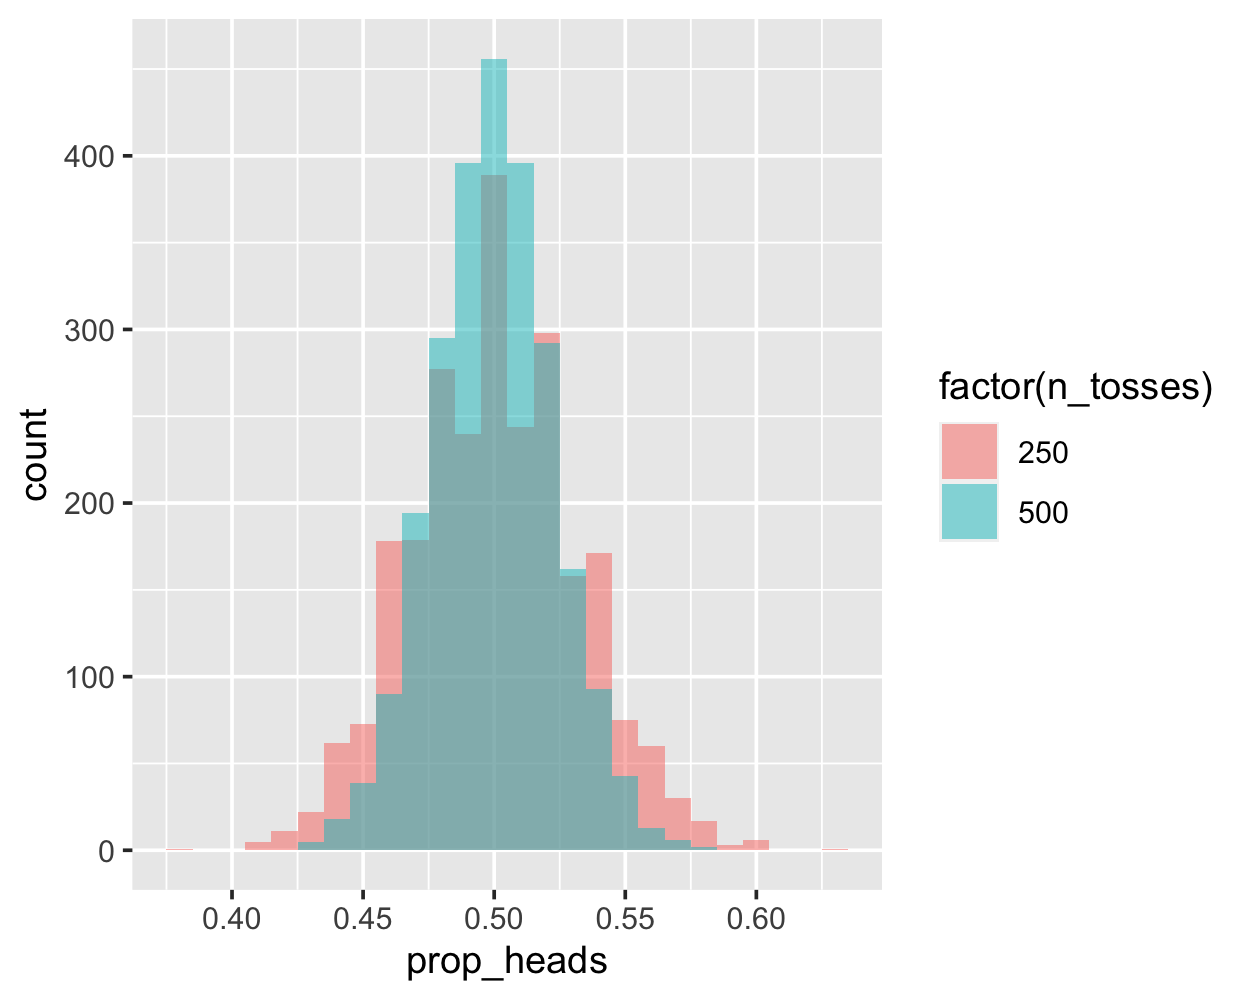

In [8]:
n_iterations = 2500

c(250, 500) |> map_dfr(
    ~data.frame(n_heads = repeat_the_experiment(n_iterations, n_tosses = .x)) |> 
        mutate(n_tosses = .x, prop_heads = n_heads / n_tosses)
) |> 
ggplot(aes(x = prop_heads, fill = factor(n_tosses))) + 
    geom_histogram(alpha = 0.5, position = 'identity', binwidth = 0.01) 

## Confidence interval

In [9]:
set.seed(568)

In [10]:
heads_140 = data.frame(
    toss = c(rep('heads', 140), rep('tails', 250 - 140))
)

heads_140 |> count(toss)

toss,n
<chr>,<int>
heads,140
tails,110


In [11]:
heads_140_bs = rep_sample_n(heads_140, replace = T, reps = 1000, size = 250)

heads_140_bs |> head()

replicate,toss
<int>,<chr>
1,heads
1,heads
1,tails
1,heads
1,heads
1,heads


In [12]:
heads_140_bs_count = heads_140_bs |>
    group_by(replicate) |>
    summarize(n_heads = sum(toss == 'heads')) |>
    mutate(deviation = n_heads - 125)

heads_140_bs_count |> head()

replicate,n_heads,deviation
<int>,<int>,<dbl>
1,129,4
2,130,5
3,123,-2
4,143,18
5,142,17
6,139,14


In [13]:
heads_140_bs_count |> nrow()

[1] 1000

In [14]:
heads_140_bs_count |> 
    summarize(
        lower_ci = quantile(deviation, 0.025),
        upper_ci = quantile(deviation, 0.975)
    )

lower_ci,upper_ci
<dbl>,<dbl>
-0.025,30
